In [35]:
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [36]:
weight = 1000000
bias = 100000
learning_rate = 0.005

In [39]:
# 기록을 위한 리스트 초기화
history_cost = []
history_epoch = []

for epoch in range(10000):
    y_hat = weight * x + bias
    cost = ((y - y_hat) ** 2).mean()

    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    # 100회마다 기록 (그래프용)
    if (epoch + 1) % 100 == 0:
        history_cost.append(cost)
        history_epoch.append(epoch + 1)
        
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : -751.447, Bias : 15285.343, Cost : 55672991.165
Epoch : 2000, Weight : -228.830, Bias : 4666.789, Cost : 5190235.733
Epoch : 3000, Weight : -69.258, Bias : 1424.614, Cost : 483872.147
Epoch : 4000, Weight : -20.536, Bias : 434.676, Cost : 45111.267
Epoch : 5000, Weight : -5.660, Bias : 132.417, Cost : 4206.839
Epoch : 6000, Weight : -1.118, Bias : 40.128, Cost : 393.436
Epoch : 7000, Weight : 0.269, Bias : 11.950, Cost : 37.923
Epoch : 8000, Weight : 0.693, Bias : 3.346, Cost : 4.780
Epoch : 9000, Weight : 0.822, Bias : 0.719, Cost : 1.690
Epoch : 10000, Weight : 0.862, Bias : -0.083, Cost : 1.402


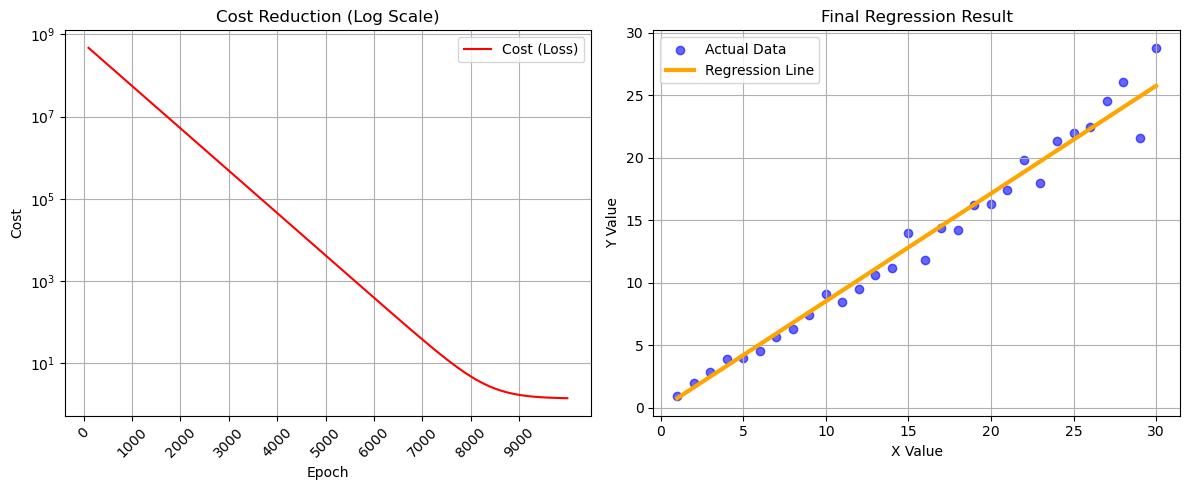

In [41]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 1. 왼쪽: Cost가 줄어드는 과정 (Log 스케일 권장 - 초기값이 너무 커서)
plt.subplot(1, 2, 1)
plt.plot(history_epoch, history_cost, color='red', label='Cost (Loss)')
plt.yscale('log') # 초기 weight/bias가 1,000,000으로 매우 커서 로그 스케일로 보는게 좋습니다.

plt.xticks(np.arange(0, epoch, 1000))
plt.xticks(rotation=45) # 글자가 겹치지 않게 45도 회전

plt.title('Cost Reduction (Log Scale)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()

# 2. 오른쪽: 실제 데이터 점과 내가 찾은 회귀선
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Actual Data', alpha=0.6) # 실제 점
plt.plot(x, weight * x + bias, color='orange', linewidth=3, label='Regression Line') # 예측 선
plt.title('Final Regression Result')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()